In [1]:
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

[0.90804253466639417, 0.82462013056367256, 0.74394964042789191, 0.67533481048109645, 0.60598316687820875, 0.54450425022288262, 0.49313001996663819, 0.44278122182981433, 0.39004303829842496, 0.33731935730873563, 0.27672769730426916]


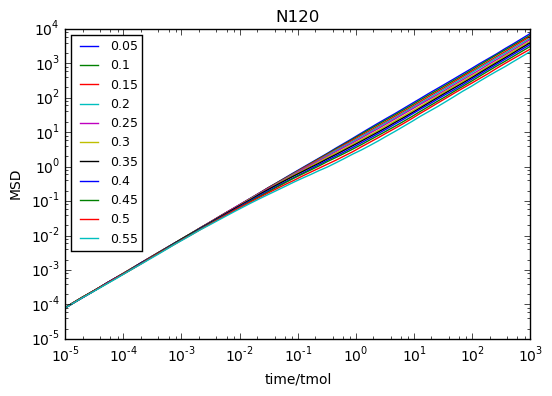

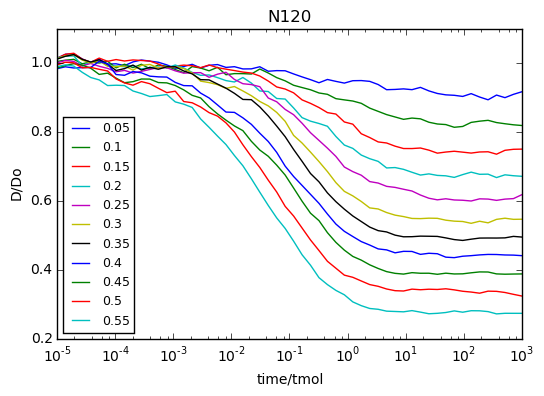

In [7]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

phis = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
tmol = 5e-5
def plotmsd(phi):
    dat = np.loadtxt('data/2Dcrowding_BDmocN120phi'+str(phi)+'.csv',delimiter=',')   
    #dat = np.loadtxt('data/2DBDmocN900phi'+str(phi)+'run0.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    ax1.loglog(t/tmol,msd/(0.005*0.005),'-',label=str(phi))
    D = 1.
    #ax1.plot(t/tmol,4*D*t,'g-')
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:]/tmol,Dt,'-',label=str(phi))
    #ax2.semilogx(t1[1:]/tmol,dt1,label='N900phi'+str(phi))
    #ax2.plot(t[1:]/tmol, [0.25]*len(t[1:]),label='0.25')
    #ax2.plot(t[1:]/tmol, [0.3]*len(t[1:]),label='0.3')
    #ax2.plot(t[1:]/tmol, [0.28]*len(t[1:]),label='0.28')
    deff = Dt[(t>1e-3)[1::]]
    return np.mean(deff)

de = []
for p in phis:
    mean= plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time/tmol")
    ax1.set_ylabel("MSD") 
    ax1.set_title('N120')
    ax2.set_title('N120')
    ymin = 0.2
    ymax = 1.1
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time/tmol")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best',fontsize=9)
    ax2.legend(loc='best',fontsize=9)  
print de

In [3]:
de120=de
phi120=phis
demean = (0.90804253466628015, 0.824620130563267, 0.74394964042802492, 0.67533481048114741, 0.60598316687796405, 0.54450425022283255, 0.49313001996674455, 0.44278122182988816, 0.3900430382981484, 0.33731935730880658, 0.27672769730434654)
destd =(0.048695583400131449, 0.04128777335104563, 0.039411437976376446, 0.036158607631194349, 0.02801296397283231, 0.029436530571336095, 0.026940353375172463, 0.02606433268370947, 0.023348225271125435, 0.021371854969047137, 0.016742903699305405)
#demean = (0.82232518466007387, 0.67392520639392806, 0.60717069792611855, 0.55025852839954958, 0.49276891544244422, 0.44289555612343745, 0.38712330108727777, 0.33810749541669016, 0.27672769730434654)
#destd = [0.030707480157085961, 0.035023853780585597, 0.027597193515691679, 0.033666295832020826, 0.027247003084485636, 0.025624678757332372, 0.023587428087556841, 0.021653369328459956, 0.016742903699305405]

In [4]:
#f1.savefig("figure/2DBDmobileN120_MSD_t.png",format='png',dpi=100)    
#f2.savefig("figure/2DBDmobileN120_Deff_t.png",format='png',dpi=100)

In [94]:
phi120.insert(0,0.0)
de120.insert(0,1.)
print phi120
print de120


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
[1.0, 0.90804253466639417, 0.82462013056367256, 0.74394964042789191, 0.67533481048109645, 0.60598316687820875, 0.54450425022288262, 0.49313001996663819, 0.44278122182981433, 0.39004303829842496, 0.33731935730873563, 0.27672769730426916]


fit range [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


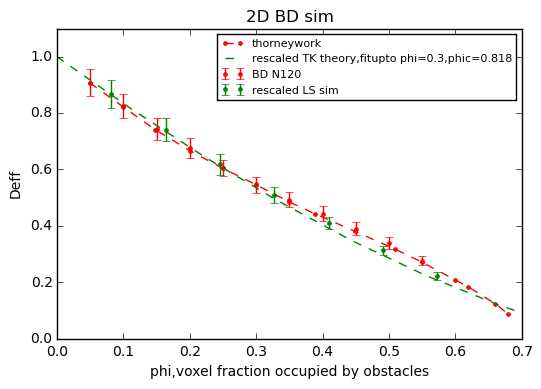

In [5]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

phiT = (0.0497212, 0.099433400000000005, 0.148086, 0.19989899999999999, 0.249588, 0.29927199999999998, 0.34895900000000002, 0.38912600000000003, 0.44831599999999999, 0.50962099999999999, 0.54979, 0.59947899999999998, 0.61956599999999995, 0.65974900000000003, 0.67879100000000003)
defT = (0.90693699999999999, 0.82233500000000004, 0.74111700000000003, 0.66666700000000001, 0.60406099999999996, 0.54653099999999999, 0.48561799999999999, 0.44162400000000002, 0.38071100000000002, 0.316413, 0.27072800000000002, 0.208122, 0.18274099999999999, 0.123519, 0.087986499999999995)
phiN5 = [0.0, 0.1, 0.3, 0.45, 0.5]
deN5 = [1.0, 0.84976487518115462, 0.58371924115249352, 0.43443111395969336, 0.38494498746001471]
phiN25=[0.0, 0.1, 0.2, 0.3, 0.45, 0.5]
deN25 = [1.0, 0.82856337163239302, 0.67611310436687866, 0.56194165749041713, 0.40482004779724923, 0.3559072650089678]
pLS =     [0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,  0.9]
dLS = [0.86747145806848147, 0.74097681476545685, 0.61851106885679674, 0.50862197898378592, 0.40992210907188997, 0.31262770674320861, 0.22125242725659167, 0.065364112848769695]
stdLS = [0.049142443574030366, 0.040703810621174688, 0.036775013630502812, 0.028396069066277844, 0.022907502692156367, 0.017054941843189016, 0.013553458624488169, 0.0036723923377878316]

def model2(phis,pc):
    alpha = 0.282
    fo=(1-alpha)/(1+alpha)
    g=1
    D = lambda x: (1-x/pc)*(math.sqrt(((1-g)*(1-x/pc)*fo+x/pc)**2 + 4*g*(1-x/pc)*fo*fo)-((1-g)*(1-x/pc)*fo+x/pc))/(2*g*(1-x/pc)*fo)
    return [D(y) for y in phis]  

def lin(x,m,c):
    return m*x+c 

#plt.plot(phiN5,deN5,'g.',label='BD N5')
plt.plot(phiT,defT,'r.--',label='thorneywork')
plt.errorbar(phi120,de120,yerr=destd,fmt='r.',label='BD N120')
xx = np.linspace(0.0,1.,10)

#LS
c1,c2 = curve_fit(lin,phi120,de120)
lastp=6#+4
tk1,tk2 = curve_fit(model2,[0]+phi120[:lastp],[1]+de120[:lastp])
plt.plot(xx,model2(xx,tk1[0]),'g--',label='rescaled TK theory,fitupto phi={},phic={:.3f}'.format(phi120[lastp-1],tk1[0]))
plt.errorbar([p*tk1[0] for p in pLS],dLS,yerr=stdLS,fmt='g.',label='rescaled LS sim')
print 'fit range',[0]+phi120[:6]
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'r--',label='Deff=1-phi/{:.3f}'.format(-1./c1[0]))
#c1,c2 = curve_fit(lin,phiN25,deN25)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'g--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
#plt.plot(xx,[1-2.*i for i in xx],'--',label='Deff=1-2phi')
#plt.plot(xx,[1-1.74*i for i in xx],'--',label='Deff=1-1.74phi thorneywork')
#plt.plot(xx,[1-(i/0.82) for i in xx],'--',label='Deff=1-phi/0.82')
#plt.plot(xx,[1-(2.1187*i) + (1.8025*i*i)-(1.6304*(i**3))+(0.9466*(i**4)) for i in xx],'--',label='saxton hexagon')
plt.title('2D BD sim')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
#plt.yscale('log')
plt.xlim(0,0.7)
plt.ylim(0.0,1.1)
#plt.grid(True)
plt.legend(fontsize=8)
#print 'phi',phis
#print 'Deff',de
#print 'phic=',-1./slope
plt.savefig("figure/2DBDLS_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()


In [105]:
phi120[:5]

[0.05, 0.1, 0.15, 0.2, 0.25]

In [78]:
dat = np.loadtxt('/home/chew/Pictures/Selection_001.csv',delimiter=',')   
phiT,defT = zip(*dat)
print phiT
print defT

(0.0497212, 0.099433400000000005, 0.148086, 0.19989899999999999, 0.249588, 0.29927199999999998, 0.34895900000000002, 0.38912600000000003, 0.44831599999999999, 0.50962099999999999, 0.54979, 0.59947899999999998, 0.61956599999999995, 0.65974900000000003, 0.67879100000000003)
(0.90693699999999999, 0.82233500000000004, 0.74111700000000003, 0.66666700000000001, 0.60406099999999996, 0.54653099999999999, 0.48561799999999999, 0.44162400000000002, 0.38071100000000002, 0.316413, 0.27072800000000002, 0.208122, 0.18274099999999999, 0.123519, 0.087986499999999995)


# 